## Übungsaufgaben zu Matplotlib (und Pandas und word2vec) - Beispiellösungen

- vgl. für die Dokumentation von Matplotlib z.B. https://matplotlib.org/index.html
- vgl. für die Dokumentation von Pandas z.B. https://pandas.pydata.org/pandas-docs/stable/ (oder auch das Notebook aus dem Tutorium der Woche 11)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("company_sales_data.csv")

In [3]:
data.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


### 1) Matplotlib
- Erstelle ein **Streudiagramm** und stelle die Verkaufszahlen von Zahnpasta pro Monat dar
- also: 
- x-Achse = Monat 
- y-Achse = Verkaufszahlen Zahnpasta


- Erstelle außerdem ein Raster (grid)

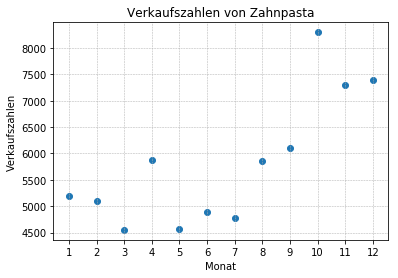

In [4]:
months  = list(data['month_number'])
toothPasteData = list(data['toothpaste'])

plt.scatter(months, toothPasteData)

plt.xlabel('Monat')
plt.ylabel('Verkaufszahlen')
plt.title('Verkaufszahlen von Zahnpasta')

plt.xticks(months)

plt.grid(linestyle="--", linewidth= 0.5)

### 2) Matplotlib
- Erstelle ein **Liniendiagramm**, welches den Gesamtumsatz der Firma pro Monat zeigt 
- also:
- x-Achse = Monat (month_number)
- y-Achse = Gesamtumsatz (total_profit


- Die Linie soll rot und gepunktet sein
- Beschrifte außerdem x- und y-Achse und gib dem Diagramm einen Titel

Text(0.5, 1.0, 'Firmenumsatz pro Monat')

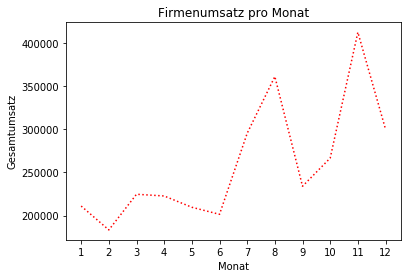

In [5]:
profit = list(data['total_profit'])
months  = list(data['month_number'])

plt.plot(months, profit, linestyle ="dotted", color="r")

plt.xticks(months)

plt.xlabel('Monat')
plt.ylabel('Gesamtumsatz')
plt.title('Firmenumsatz pro Monat')

### 3) Matplotlib
- Erstelle noch ein **Liniendiagramm**,
- diesmal soll die die Anzahl der pro Monat verkauften Einheiten für jedes Produkt angezeigt werden
- d.h. für jedes Produkt eine Linie 
- hebe bei den Linien die Datenpunkte hervor


- ertelle außerdem eine Legende (dafür müssen die Linien Labels haben)

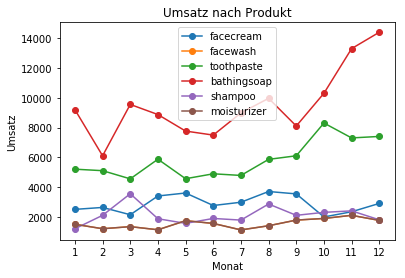

In [6]:
months  = list(data['month_number'])
faceCreme = list(data['facecream'])
faceWash = list(data['facewash'])
toothPaste = list(data['toothpaste'])
bathingSoap = list(data['bathingsoap'])
shampoo = list(data['shampoo'])
moisturizer = list(data['moisturizer'])

plt.plot(months, faceCreme,   label = 'facecream', marker='o')
plt.plot(months, faceWash,   label = 'facewash',  marker='o')
plt.plot(months, toothPaste, label = 'toothpaste', marker='o')
plt.plot(months, bathingSoap, label = 'bathingsoap', marker='o')
plt.plot(months, shampoo, label = 'shampoo', marker='o')
plt.plot(months, moisturizer, label = 'moisturizer', marker='o')
    
plt.xticks(months)

plt.xlabel('Monat')
plt.ylabel('Umsatz')
plt.title('Umsatz nach Produkt')

plt.legend(loc='best')

### 4) Matplotlib
- Erstelle ein **Balkendiagramm**, welches die Verkaufszahlen von Bathing Soap pro Monat zeigt
- Färbe die Balken schwarz
- Bezeichne die Achsen, erstelle enen Titel
- Speicher das Diagramm als pdf 


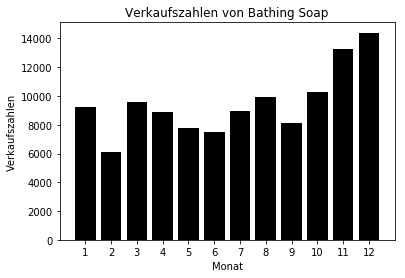

In [7]:
bathingSoap = list(data['bathingsoap'])
months  = list(data['month_number'])

plt.bar(months, bathingSoap, color='k')

plt.xlabel('Monat')
plt.ylabel('Verkaufszahlen')
plt.title('Verkaufszahlen von Bathingsoap')

plt.xticks(months )
plt.title('Verkaufszahlen von Bathing Soap')
plt.savefig('Verkaufszahlen_BathingSoap.pdf')

### 5)  Wort-Vektoren 
- Nimm die Datei "speech.txt" aus dem Lernraum 
- Nutze gensim und word2vec, um Wortvektoren für die Wörter aus dieser Datei zu lernen (vgl. für word2vec z.B. das Notebook aus dem achten Tutorium)
- Plotte diese Wortvektoren anschließend in ein Streudiagramm (bzw. eine Teilmenge dieser Wortvektoren) und annotiere sie
- Speicher das Streudiagramm als pdf


- *was muss hierfür noch importiert werden?*
- *Wie müssen die Daten aussehen, die dem word2vec-Modell übergeben werden?*

In [8]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import gensim
from gensim.models import word2vec
from sklearn.decomposition import PCA
import itertools

In [9]:
with open('speech.txt', 'r') as f:
    actual_lines = f.readlines()

In [10]:
#actual_lines

In [11]:
sentences = []
tok_sentences = []

for line in actual_lines:
    sentences.append(sent_tokenize(line))    

for sent in sentences:
    for word in sent:
        tok_sentences.append(word_tokenize(word)) 

In [12]:
#sentences

In [13]:
#tok_sentences

In [14]:
# word2vec Modell trainieren
model = gensim.models.Word2Vec(tok_sentences, min_count=1,size=300,workers=2)

In [15]:
# das gelernte Vokabular 
words = model.wv.vocab
#words

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


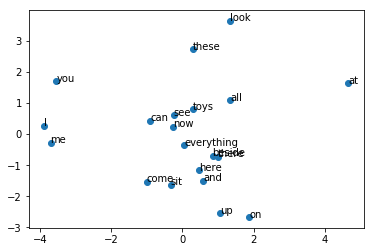

In [16]:
# ein Subset unseres Vokabulars nehmen 
words_subset = dict(itertools.islice(words.items(), 20))

# alle Vektoren unseres Modells abrufen
X = model[words_subset]

# ein zweidimensionales PCA Modell erstellen es mit den Vektoren trainieren 
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#ein Streudiagramm erstellen 
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words_subset):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.savefig("Wort-Vektoren.pdf")